# COVID-19 Data Visualization
## By Sathya Balakumar

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])

df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)


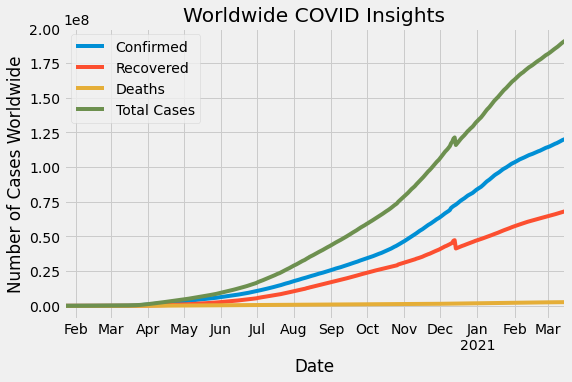

In [83]:
worldwide_df = df.groupby(['Date']).sum()
worldwide_df.head()
w = worldwide_df.plot(figsize = (8,5))
w.set_xlabel('Date')
w.set_ylabel('Number of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

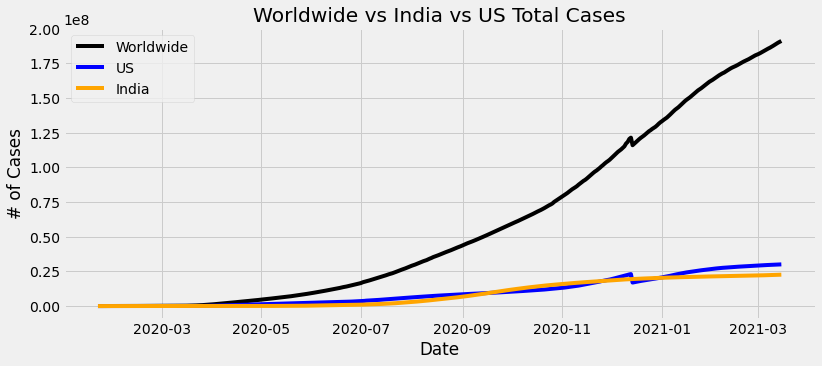

In [84]:
#US and India Daily Cases and Deaths
us_df = df[df['Country'] == 'US'].groupby(['Date']).sum()
ind_df = df[df['Country'] == 'India'].groupby(['Date']).sum()

fig = plt.figure(figsize =(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], color = 'k', label = 'Worldwide')
ax.plot(us_df[['Total Cases']], color = 'b', label = 'US')
ax.plot(ind_df[['Total Cases']], color = 'orange', label = 'India')
ax.set_xlabel('Date')
ax.set_ylabel('# of Cases')
ax.title.set_text('Worldwide vs India vs US Total Cases')

plt.legend(loc = 'upper left')
plt.show()



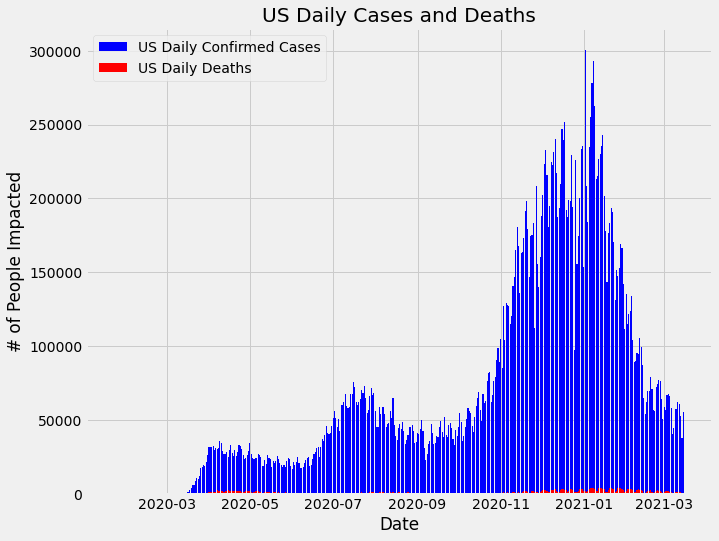

In [89]:
#US Daily Cases and Deaths

us_df = us_df.reset_index()
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color = 'b', label = 'US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color = 'r', label = 'US Daily Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('# of People Impacted')
ax.title.set_text('US Daily Cases and Deaths')

ax.legend(loc = 'upper left')
plt.show()


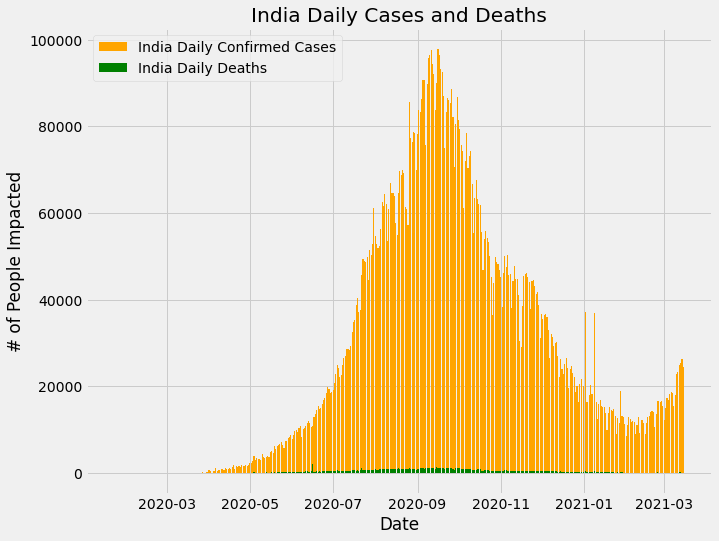

In [87]:
#India Daily Cases and Deaths

ind_df = ind_df.reset_index()
ind_df['Daily Confirmed'] = ind_df['Confirmed'].sub(ind_df['Confirmed'].shift())
ind_df['Daily Deaths'] = ind_df['Deaths'].sub(ind_df['Deaths'].shift())

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

ax.bar(ind_df['Date'], ind_df['Daily Confirmed'], color = 'orange', label = 'India Daily Confirmed Cases')
ax.bar(ind_df['Date'], ind_df['Daily Deaths'], color = 'g', label = 'India Daily Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('# of People Impacted')
ax.title.set_text('India Daily Cases and Deaths')

ax.legend(loc = 'upper left')
plt.show()


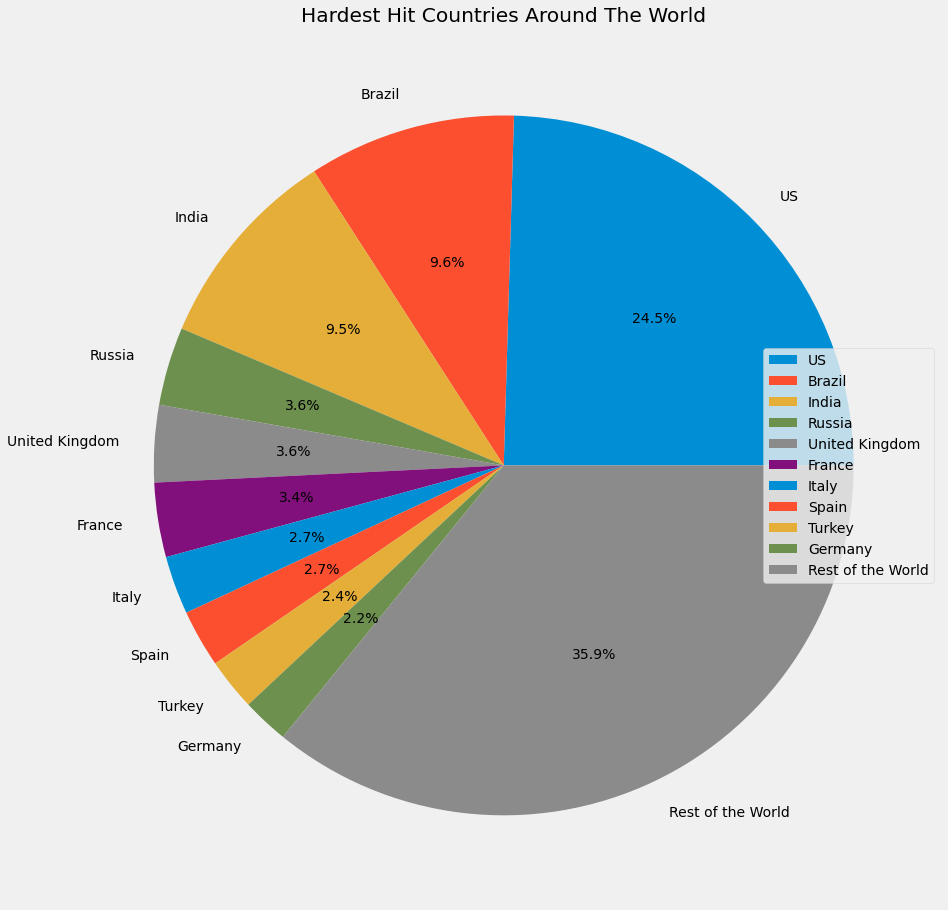

In [98]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)

today_df = df[df["Date"] == yesterday.strftime("%Y-%m-%d")]
today_df.head()
top_10 = today_df.sort_values(['Confirmed'], ascending = False)[:10]
top_10.loc['rest-of-the-world'] = today_df.sort_values(['Confirmed'], ascending = False)[10:].sum()
top_10.loc['rest-of-the-world', 'Country'] = 'Rest of the World'

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels = top_10['Country'], autopct = '%1.1f%%')
ax.title.set_text('Hardest Hit Countries Around The World')
ax.legend(loc = 'right')
plt.show()